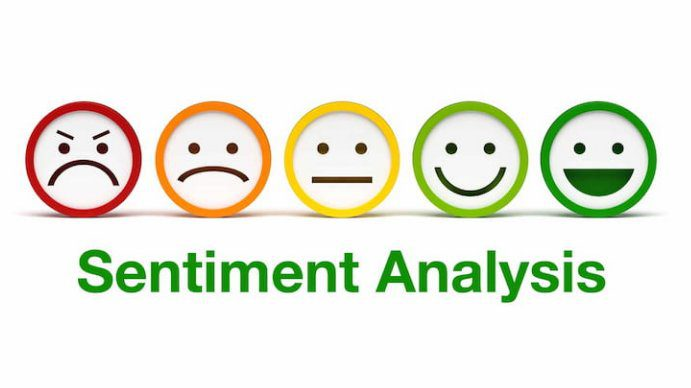

Sentiment analysis is a process of identifying and extracting subjective information from text, such as opinions, attitudes, emotions, and feelings. Sentiment analysis is widely used in various fields, including marketing, social media monitoring, customer service, and product development. A sentiment analysis project requires a combination of text mining, natural language processing, and machine learning techniques to accurately identify the sentiment behind text data.

   This project is based on the analysis of the reviews user gives on **Amazon** to make others aware of their experience and moreover about the quality of the product and brand. So, by analyzing that data we can tell the users a lot about the products and also the ways to enhance the quality of the product.
   
   Today we will be using Machine Learning to analyze that data and make it more efficient to understand and prediction ready. In this project, the product under consideration is **"One Plus Nord CE 2 Lite 5g"**. Our task is to predict whether the review given is positive or negative. 
   
   Before starting the code, generate the dataset by running the another python file in this repository.

## 1. Importing Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd 
import re 
import string
import nltk # nlp 
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline

The libraries used are : 

* **Numpy** : For array manipulation
* **Pandas** : For importing the dataset.
* **re** : To search pattern in string ( text) 
* **nltk**: For text analysis
* **Counter**: Counting hashable objects
* **textblob**: processing textual data
* **Scikit-learn** : For importing the model, accuracy module, and CountVectorizer.
* **Matplotlib / Wordcloud** : To plot the visualization.

In [2]:
# import the downloaded dataset using the below code.
data = pd.read_csv('reviews.csv')
data.head()

,product,body
0,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...",Worst Phone ever got..not working properly usi...
1,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...",A sturdy and handy mobile with fast user exper...
2,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...",Overall good phone
3,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...",The media could not be loaded.\n ...
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...",It is value for moneyAmazing camera 🤩📸More fea...


## 2. Getting Meaningful Insights

In [3]:
data.shape

(4990, 2)

In [4]:
data.rename(columns={'body':'reviews'}, inplace=True)   # rename: body => reviews
data.head()

,product,reviews
0,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...",Worst Phone ever got..not working properly usi...
1,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...",A sturdy and handy mobile with fast user exper...
2,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...",Overall good phone
3,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...",The media could not be loaded.\n ...
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...",It is value for moneyAmazing camera 🤩📸More fea...


In [5]:
data.isnull().sum()

product      0
reviews    240
dtype: int64

In [6]:
# Since there are few null values in our dataset, we drop those entire rows 
# and then check again if there are any null values remaining.
data = data.dropna()
data.isnull().sum()

product    0
reviews    0
dtype: int64

In [7]:
#Checking how many unique values we have in the product feature
data['product'].unique()

array(['OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM, 128GB Storage)'],
      dtype=object)

## 3.1. Preprocessing and cleaning the reviews (Round 1)

In [8]:
# Since we only have one unique value in this feature we can go ahead and remove this feature as its varince is zero
data.drop(columns ='product', axis = 'columns', inplace=True)

In [9]:
data['reviews'] = data['reviews'].str.lower()  # converting all text into lower case
data.head()

,reviews
0,worst phone ever got..not working properly usi...
1,a sturdy and handy mobile with fast user exper...
2,overall good phone
3,the media could not be loaded.\n ...
4,it is value for moneyamazing camera 🤩📸more fea...


In [10]:
punctuation = string.punctuation 

def remove_punctuation(text):
    """
    removes punctuations from the string
    """
    text = text.translate(str.maketrans({key: " {0} ".format(key) for key in punctuation}))
    text = "".join([i for i in text if i not in punctuation])
    return text

In [11]:
# remove punctuations from the 'reviews' column
data['reviews'] = data['reviews'].apply(lambda word: remove_punctuation(word)) 
data.head()

,reviews
0,worst phone ever got not working properly u...
1,a sturdy and handy mobile with fast user exper...
2,overall good phone
3,the media could not be loaded \n ...
4,it is value for moneyamazing camera 🤩📸more fea...


In [12]:
def deEmojify(inputString):
    """
    removes all the emojis from the string
    """
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [13]:
# remove emojis from the 'reviews' column
data['reviews'] = data['reviews'].apply(lambda word: deEmojify(word))
data.head()

,reviews
0,worst phone ever got not working properly u...
1,a sturdy and handy mobile with fast user exper...
2,overall good phone
3,the media could not be loaded \n ...
4,it is value for moneyamazing camera more featu...


In [14]:
# removing stopwords  
# import nltk
# nltk.download('stopwords')
# import stopwords with nltk

In [15]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

# in order to run the above line, uncomment the above line of code.

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [16]:
stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
    """
    removes all the stopwords(common words) from the string
    """
    return " ".join([i for i in str(text).split() if i not in stopwords])

In [17]:
data['reviews'] = data['reviews'].apply(lambda x: remove_stopwords(x))
data.head()

,reviews
0,worst phone ever got working properly using la...
1,sturdy handy mobile fast user experience easy ...
2,overall good phone
3,media could loaded nice
4,value moneyamazing camera features price segment


In [18]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(text):
    """
    remove inflectional endings only and return the base or dictionary form of a word
    """
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text])

In [19]:
# convert the original words into base words
data["reviews"] = data["reviews"].apply(lambda text: lemmatize_words(text))
data.head()

,reviews
0,worst phone ever get work properly use last 6m...
1,sturdy handy mobile fast user experience easy ...
2,overall good phone
3,medium could load nice
4,value moneyamazing camera feature price segment


## 3.2 Cleaning the reviews (Round 2)

In [20]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('phone|phones', '', text) # remove phone
    text =  re.sub('mobile','', text) # remove mobile
    text =  re.sub('one|plus|oneplus','', text) # remove oneplus
    text =  re.sub('amazon','', text) # remove amazon
    text =  re.sub('\d+','', text) # remove numbers 0-9
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like S or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad 
    return text

round2 = lambda x: clean_text_round2(x)

In [21]:
data["reviews"] = data["reviews"].apply(lambda text: clean_text_round2(text))
data.head()

,reviews
0,worst ever get work properly use last month f...
1,sturdy handy fast user experience easy use ne...
2,overall good
3,medium could load nice
4,value myamazing camera feature price segment


In [22]:
cnt = Counter()
for i in data['reviews'].values:
    for j in i.split():
        cnt[j]+=1    # counts the number of times each word was repeated in the dataset
        
common = cnt.most_common(10) # the 10 most frequent words
common

[('good', 2101),
 ('camera', 1184),
 ('quality', 839),
 ('battery', 765),
 ('product', 558),
 ('nice', 537),
 ('use', 415),
 ('buy', 406),
 ('like', 369),
 ('price', 342)]

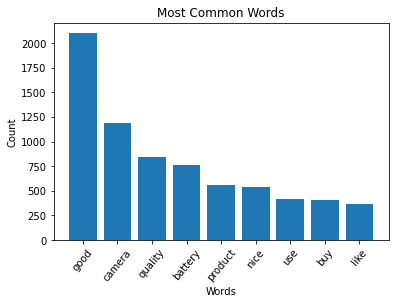

In [23]:
# plotting the 10 most frequent words in a barplot 
tag, count = [], []
for i in range(len(common)-1):
    tag.append(common[i][0])
    count.append(common[i][1])
plt.bar(tag, count)
plt.xticks(rotation=50)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Most Common Words")
plt.show()

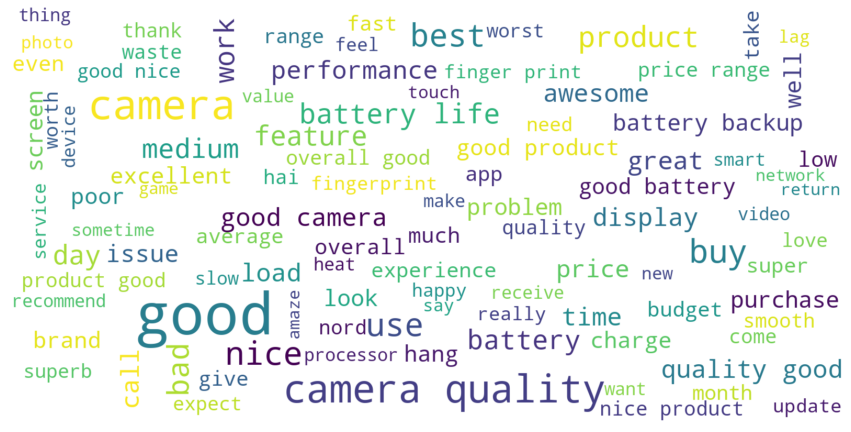

In [24]:
consolidated=' '.join(word for word in data['reviews'].astype(str))
wordCloud=WordCloud(width=1600,height=800,
                    random_state=21,max_font_size=110, 
                    max_words=100, background_color='white')
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
# ! pip install -U textblob

In [26]:
pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data['polarity'] = data['reviews'].apply(pol)
data.head(5)

,reviews,polarity
0,worst ever get work properly use last month f...,-0.258333
1,sturdy handy fast user experience easy use ne...,0.324242
2,overall good,0.350000
3,medium could load nice,0.600000
4,value myamazing camera feature price segment,0.000000


In [27]:
data['Sentiment'] = np.where(data['polarity']> 0, 1, 0) # positive=1, negative=0
data.head()

,reviews,polarity,Sentiment
0,worst ever get work properly use last month f...,-0.258333,0
1,sturdy handy fast user experience easy use ne...,0.324242,1
2,overall good,0.350000,1
3,medium could load nice,0.600000,1
4,value myamazing camera feature price segment,0.000000,0


<AxesSubplot:>

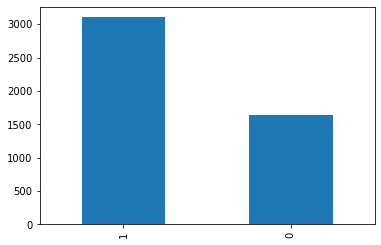

In [28]:
data.Sentiment.value_counts().plot.bar()

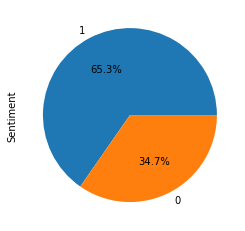

In [29]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");

## 4. Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

X = data['reviews']   # define 'reviews' as feature X
y = data['Sentiment']   # define 'Sentiment' as label y

In [31]:
# split our dataset into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape    

((3800,), (950,), (3800,), (950,))

## 5. Data Preperation

In [33]:
# convert text to numerical data

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train)   # use fit_transform for training set
X_test_bow = cv.transform(X_test)       # use transform for testing set
X_train_bow.shape, X_test_bow.shape

((3800, 3507), (950, 3507))

In [34]:
len(list(cv.get_feature_names()))

3507

## 6. Model Building

### 6.1. Logistic Regression

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
 
#Model fitting
model.fit(X_train_bow,y_train)
 
#testing the model
pred = model.predict(X_test_bow)
 
#model accuracy
logistic = accuracy_score(y_test,pred)
logistic

0.9526315789473684

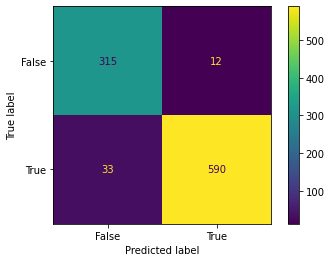

In [36]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()

### 6.2. Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
  
model = DecisionTreeClassifier(random_state=0)

#Model fitting
model.fit(X_train_bow,y_train)
  
#testing the model
pred = model.predict(X_test_bow)

#model accuracy
decision_tree = accuracy_score(y_test,pred)
decision_tree

0.9505263157894737

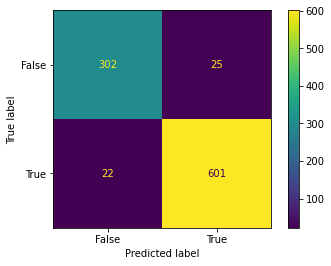

In [38]:
cm = confusion_matrix(y_test,pred) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()

### 6.3. Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
 
#Model fitting
model.fit(X_train_bow,y_train)
 
#testing the model
pred = model.predict(X_test_bow)
 
#model accuracy
naive_bayes = accuracy_score(y_test,pred)
naive_bayes

0.8168421052631579

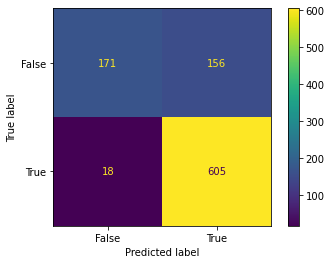

In [40]:
cm = confusion_matrix(y_test,pred) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()

### 6.4 Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier(random_state=0)

# model fitting
model.fit(X_train_bow,y_train)
  
#testing the model
pred = model.predict(X_test_bow)

# model accuracy
random_forest = accuracy_score(y_test,pred)
random_forest

0.9505263157894737

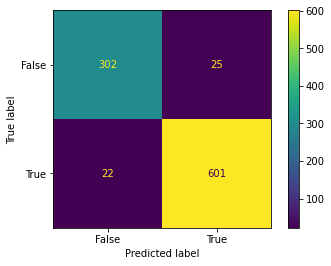

In [42]:
cm = confusion_matrix(y_test,pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])
  
cm_display.plot()
plt.show()

### 6.5 KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
  
model = KNeighborsClassifier(n_neighbors=9)

# model fitting
model.fit(X_train_bow,y_train)
  
#testing the model
pred = model.predict(X_test_bow)

# model accuracy
knn = accuracy_score(y_test,pred)
knn

0.8989473684210526

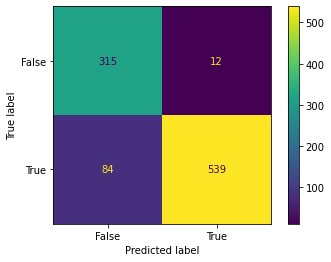

In [44]:
cm = confusion_matrix(y_test,pred)
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])
  
cm_display.plot()
plt.show()

In [45]:
models = [logistic, decision_tree, naive_bayes, random_forest, knn]
max(models)

0.9526315789473684